In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import LogisticRegression

In [2]:

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12,ha='center')
        
def get_class_metrics(y_test, y_pred):
  
    acc = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    precision = round(precision_score(y_pred,y_test),3)
    recall = round(recall_score(y_pred,y_test),3)
    
    scores = [acc, f1, precision, recall]
    # Get confusion matrix
    mat = confusion_matrix(y_test, y_pred)
    
      # create confusion matrix
    sns.heatmap(mat, annot=True, fmt='d')
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('True', fontsize=13)
    plt.title('Confusion Matrix', fontsize=14)
    
    return scores, plt, mat
  
  
def plot_data (hue, data):
    for i, col in enumerate(data.columns):
      plt.figure(i)
      ax = sns.countplot(x=data[col], hue=hue, data=data)
      
      
def display_df(scores, model):
    df = pd.DataFrame(scores).T
    df = df.rename(index={0: model}, columns={0: 'Accuracy', 1: 'F1 Score',2 :"Precision", 3:"recall"})
    return(df)


In [3]:
data = pd.read_csv("C:/Users/Kashi/Documents/formación/ciencia de datos/proyeectos/classification/mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

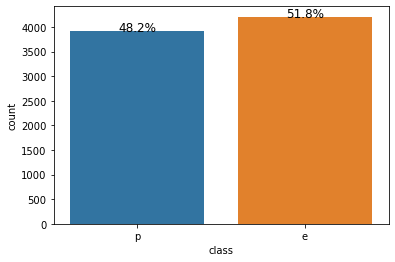

In [6]:
#Controlar si es un data set balanceado
ax= sns.countplot(data=data, x = "class")
without_hue(ax, data["class"])

In [7]:
  def plot_data (hue, data):
    for i, col in enumerate(data.columns):
      plt.figure(i)
      ax = sns.countplot(x=data[col], hue=hue, data=data)

C:\Temp/ipykernel_13952/900150121.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


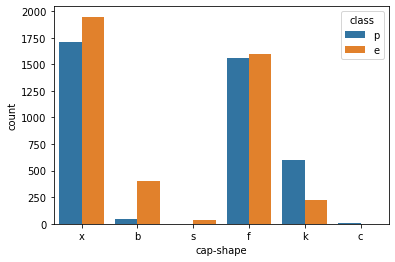

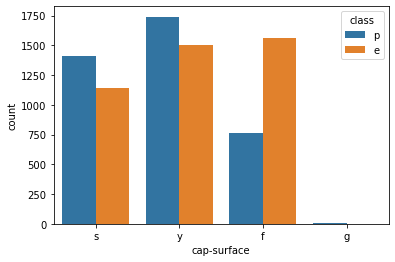

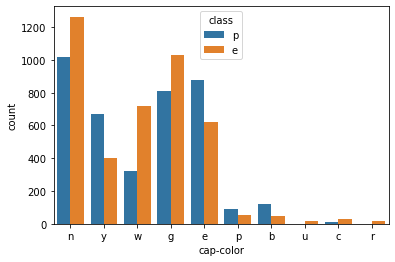

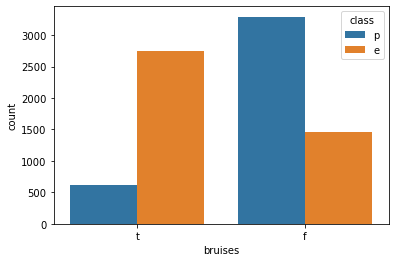

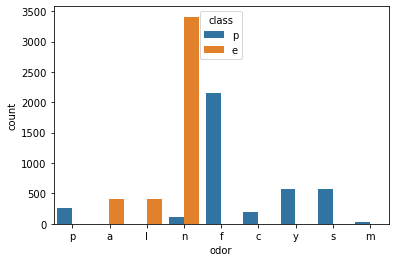

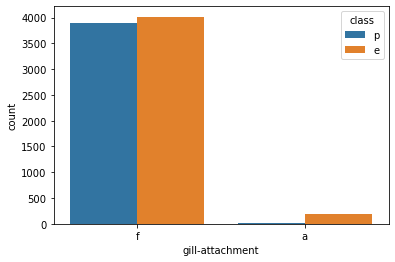

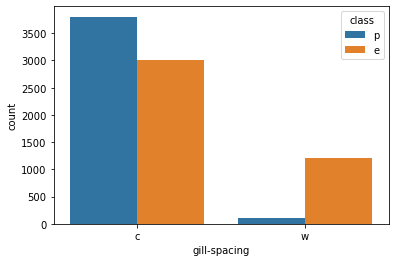

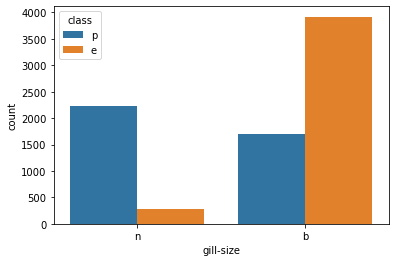

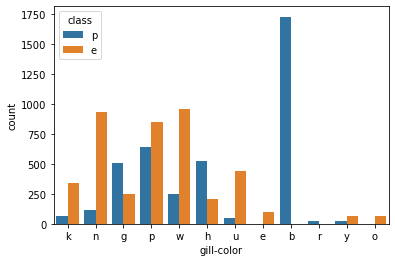

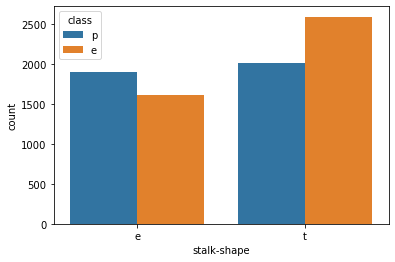

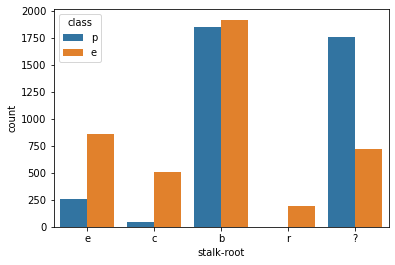

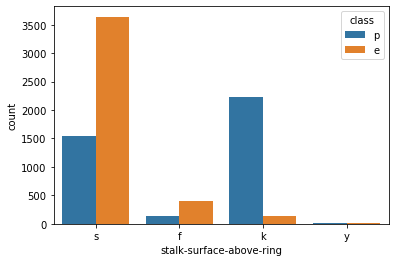

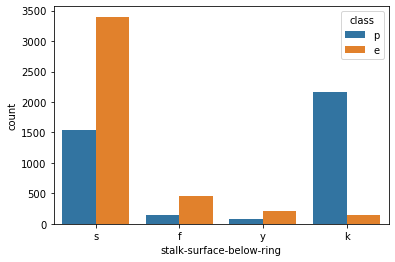

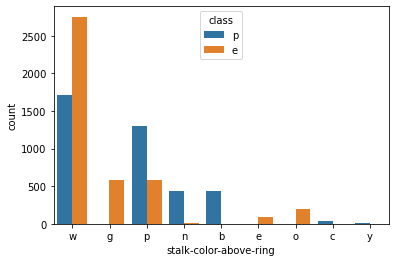

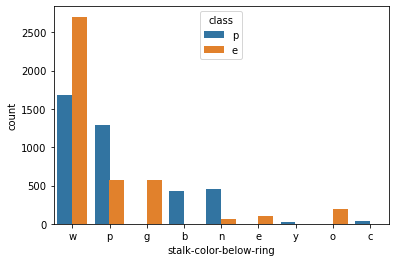

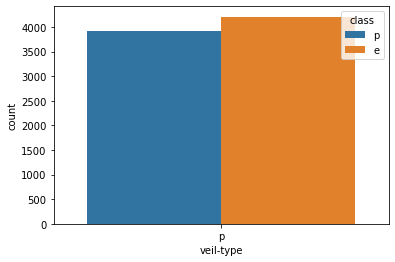

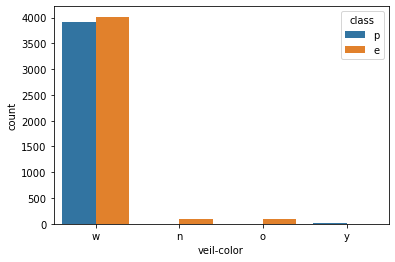

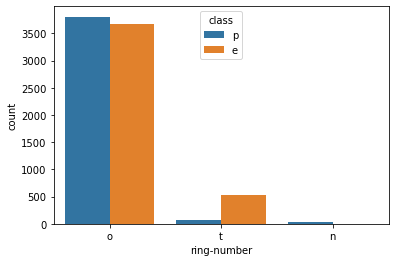

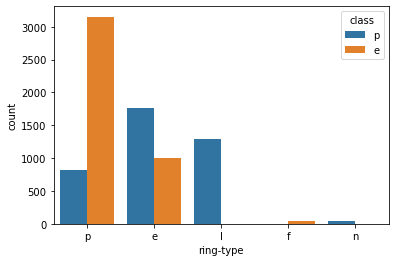

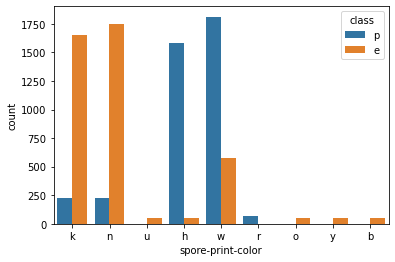

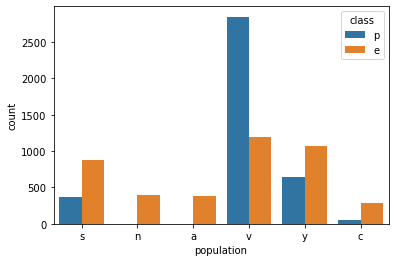

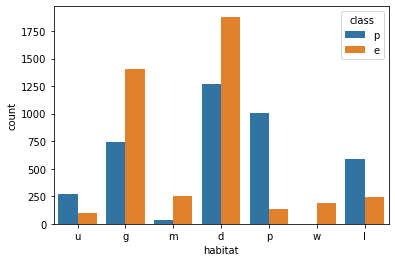

In [8]:
hue = data["class"]
data_to_plot = data.drop("class", axis=1)

plot_data(hue, data_to_plot)

In [9]:
 #Preprocessing.
 Le = LabelEncoder()
 data["class"] = Le.fit_transform(data["class"])

In [10]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
#Encode
encode_data = pd.get_dummies(data)
encode_data

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
##Model// We encode before, justo because de data set is to small.
encode_data = pd.get_dummies(data)

In [13]:
y = data["class"].values.reshape(-1,1)
X = encode_data.drop(["class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split (X,y)


In [14]:
# logistit
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\Kashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [15]:
y_prob = log.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5 , 1, 0)

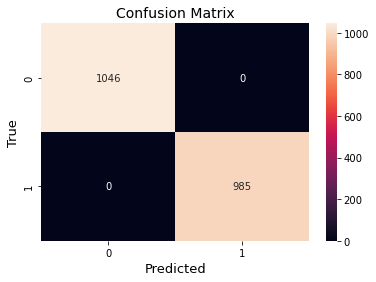

In [16]:
scoreslog, plt, matlog = get_class_metrics(y_test, y_pred)

In [17]:
scoreslog

[1.0, 1.0, 1.0, 1.0]

In [18]:
display_df(scoreslog, "Logaritmo")

,Accuracy,F1 Score,Precision,recall
Logaritmo,1.0,1.0,1.0,1.0


In [19]:
fpr, tpr,tresholds = roc_curve ( y_test, y_prob)
roc_auc_log = auc(fpr, tpr)
roc_auc_log

1.0

In [20]:
def plot_roc (roc_auc):
    plt.figure (figsize = (7,7))
    plt.title ("Receiver Operating Characteristics")
    plt.plot(fpr, tpr, color="b", label = "AUC")
    plt.legend(loc="lower right")
    plt.plot ([0,1], [0,1], linestyle = "--")
    plt.axis("tight")
    plt.ylabel("True positve rate")
    plt.xlabel("false positive rate")
  

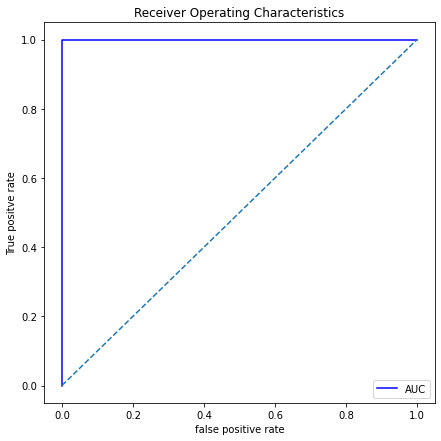

In [21]:
plot_roc(roc_auc_log)

In [25]:
### linear Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [26]:
QuadraticDiscriminantAnalysis

sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

In [28]:
qda = QuadraticDiscriminantAnalysis()


In [29]:
qda.fit(X_train,y_train)
y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda =np.where(y_prob_qda> 0.5,1,0)


c:\Users\Kashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Kashi\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


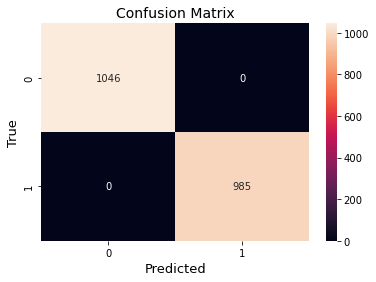

In [30]:
scoresqda, plt, matqda = get_class_metrics(y_test, y_pred_qda)


In [31]:
display_df(scoresqda, "QDA")

,Accuracy,F1 Score,Precision,recall
QDA,1.0,1.0,1.0,1.0


In [32]:

fpr, tpr,tresholds = roc_curve ( y_test, y_prob_qda)
roc_auc_qda = auc(fpr, tpr)
roc_auc_qda

1.0

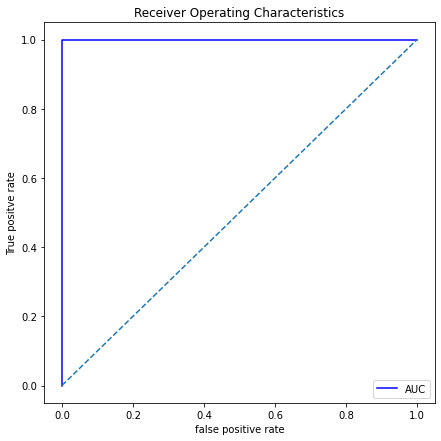

In [33]:
plot_roc(roc_auc_qda)